In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#  Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

In [2]:
ilpd=pd.read_csv("ILPD.csv")
ilpd.columns=["Age","Gender","TB","DB","AAP","SGPT","SGPT2","TPT","ALB","A/G","Class"]
ilpd.head()

,Age,Gender,TB,DB,AAP,SGPT,SGPT2,TPT,ALB,A/G,Class
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


# Summarize important observations from the data set 

In [3]:
ilpd.shape

(582, 11)

# Calculate five-point summary for numerical variables

In [4]:
ilpd.describe()

,Age,TB,DB,AAP,SGPT,SGPT2,TPT,ALB,A/G,Class
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Summarize observations for categorical variables – no. of categories, % observations in each category

In [5]:
ilpd["Gender"].value_counts()

Male      441
Female    141
Name: Gender, dtype: int64

In [6]:
ilpd["Gender"].value_counts(normalize=True)*100

Male      75.773196
Female    24.226804
Name: Gender, dtype: float64

In [7]:
ilpd["Class"].value_counts()

1    415
2    167
Name: Class, dtype: int64

In [8]:
ilpd["Class"].value_counts(normalize=True)*100

1    71.305842
2    28.694158
Name: Class, dtype: float64

# Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 MARKS) Some pointers which would help you, but don’t be limited by these.

# Do variables have missing/null values? 

In [9]:
ilpd.isnull().sum()

Age       0
Gender    0
TB        0
DB        0
AAP       0
SGPT      0
SGPT2     0
TPT       0
ALB       0
A/G       4
Class     0
dtype: int64

In [10]:
ilpd.dtypes

Age         int64
Gender     object
TB        float64
DB        float64
AAP         int64
SGPT        int64
SGPT2       int64
TPT       float64
ALB       float64
A/G       float64
Class       int64
dtype: object

In [11]:
ilpd.fillna(0,inplace=True)

In [12]:
classes=["Gender","Class"]
df=ilpd.drop(classes,axis=1)

# Do variables have outliers? 

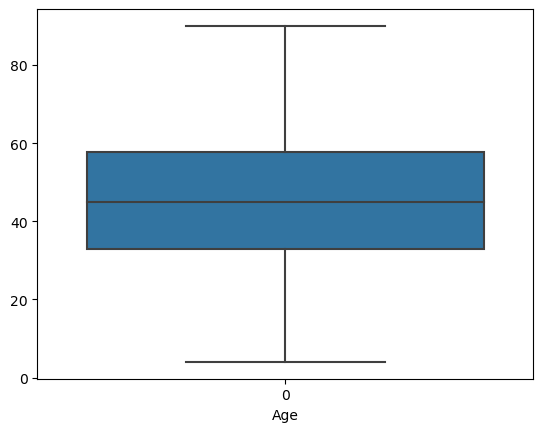

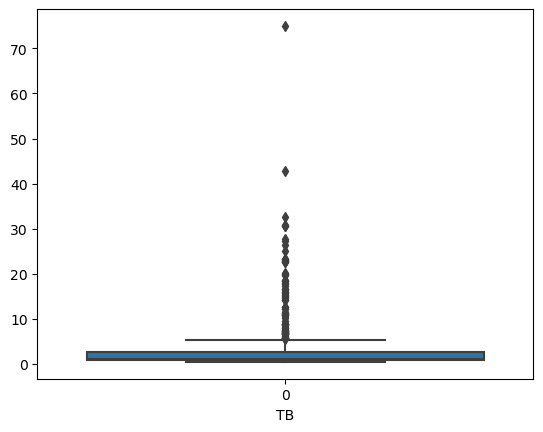

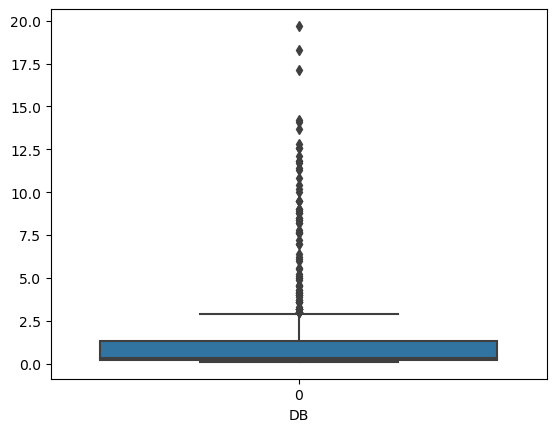

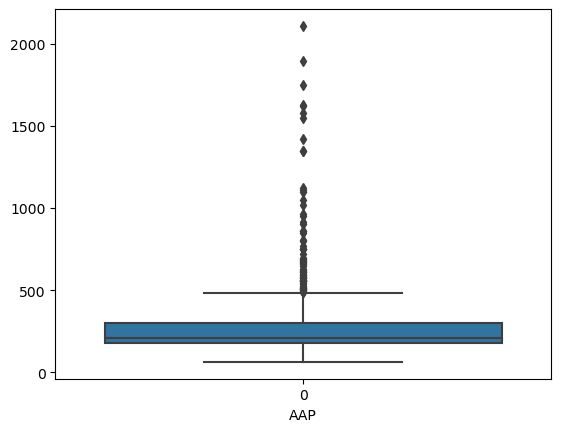

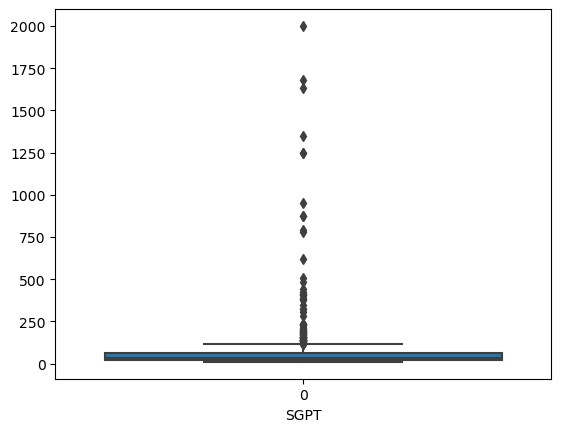

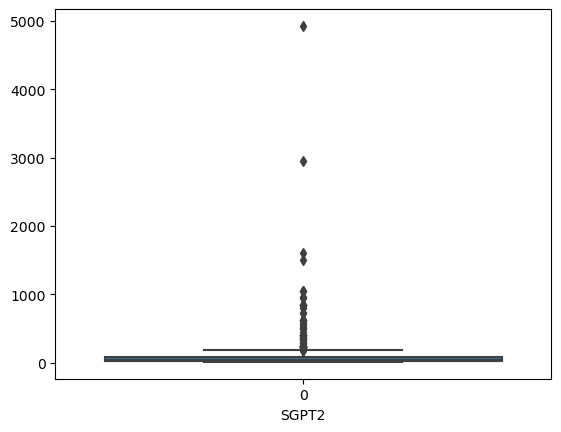

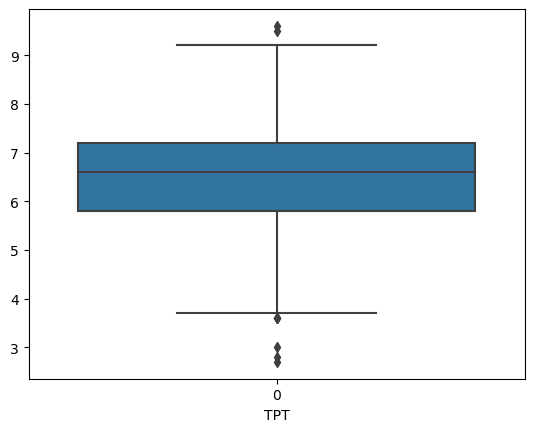

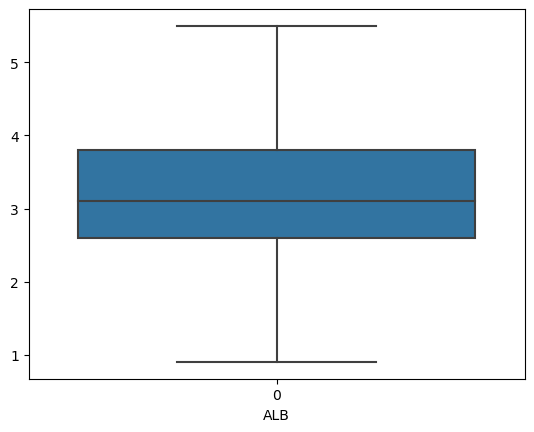

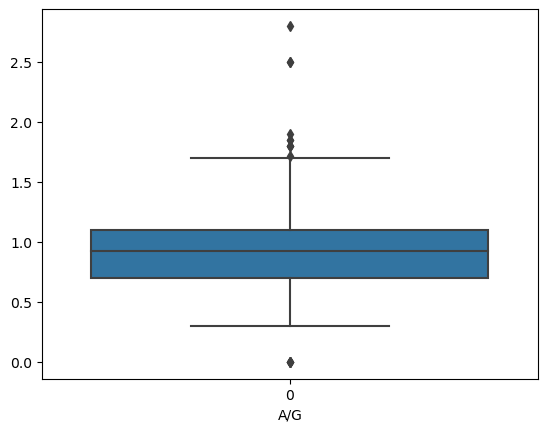

In [13]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [14]:
outliers=["TB","DB","AAP","SGPT","SGPT2","ALB","A/G"]

In [15]:
for i in outliers:
    ilpd[i]=np.sqrt(ilpd[i])

# Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectifythe problem

In [16]:
ilpd["Class"].value_counts(normalize=True)

1    0.713058
2    0.286942
Name: Class, dtype: float64

The target column is imblance. to balance this data I can random over sampler, after slipting the data. So that my model does not take bias decision.

# Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

In [17]:
feature=ilpd.drop(["Class"],axis=1)

In [18]:
feature.head()

,Age,Gender,TB,DB,AAP,SGPT,SGPT2,TPT,ALB,A/G
0,62,Male,3.301515,2.345208,26.438608,8.000000,10.000000,7.5,1.788854,0.860233
1,62,Male,2.701851,2.024846,22.135944,7.745967,8.246211,7.0,1.816590,0.943398
2,58,Male,1.000000,0.632456,13.490738,3.741657,4.472136,6.8,1.843909,1.000000
3,72,Male,1.974842,1.414214,13.964240,5.196152,7.681146,7.3,1.549193,0.632456
4,46,Male,1.341641,0.836660,14.422205,4.358899,3.741657,7.6,2.097618,1.140175


In [19]:
data_type=ilpd.dtypes

Relevant categorical plot

In [20]:
cat_col=list(data_type[data_type=="object"].index)

In [21]:
cat_col

['Gender']

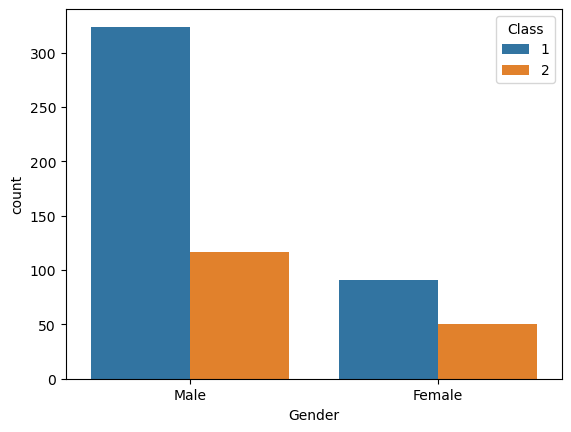

In [22]:
for i in cat_col:
    sns.countplot(x=i,data=ilpd,hue=ilpd["Class"])
    plt.show()

checking significent value :

# Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable. 

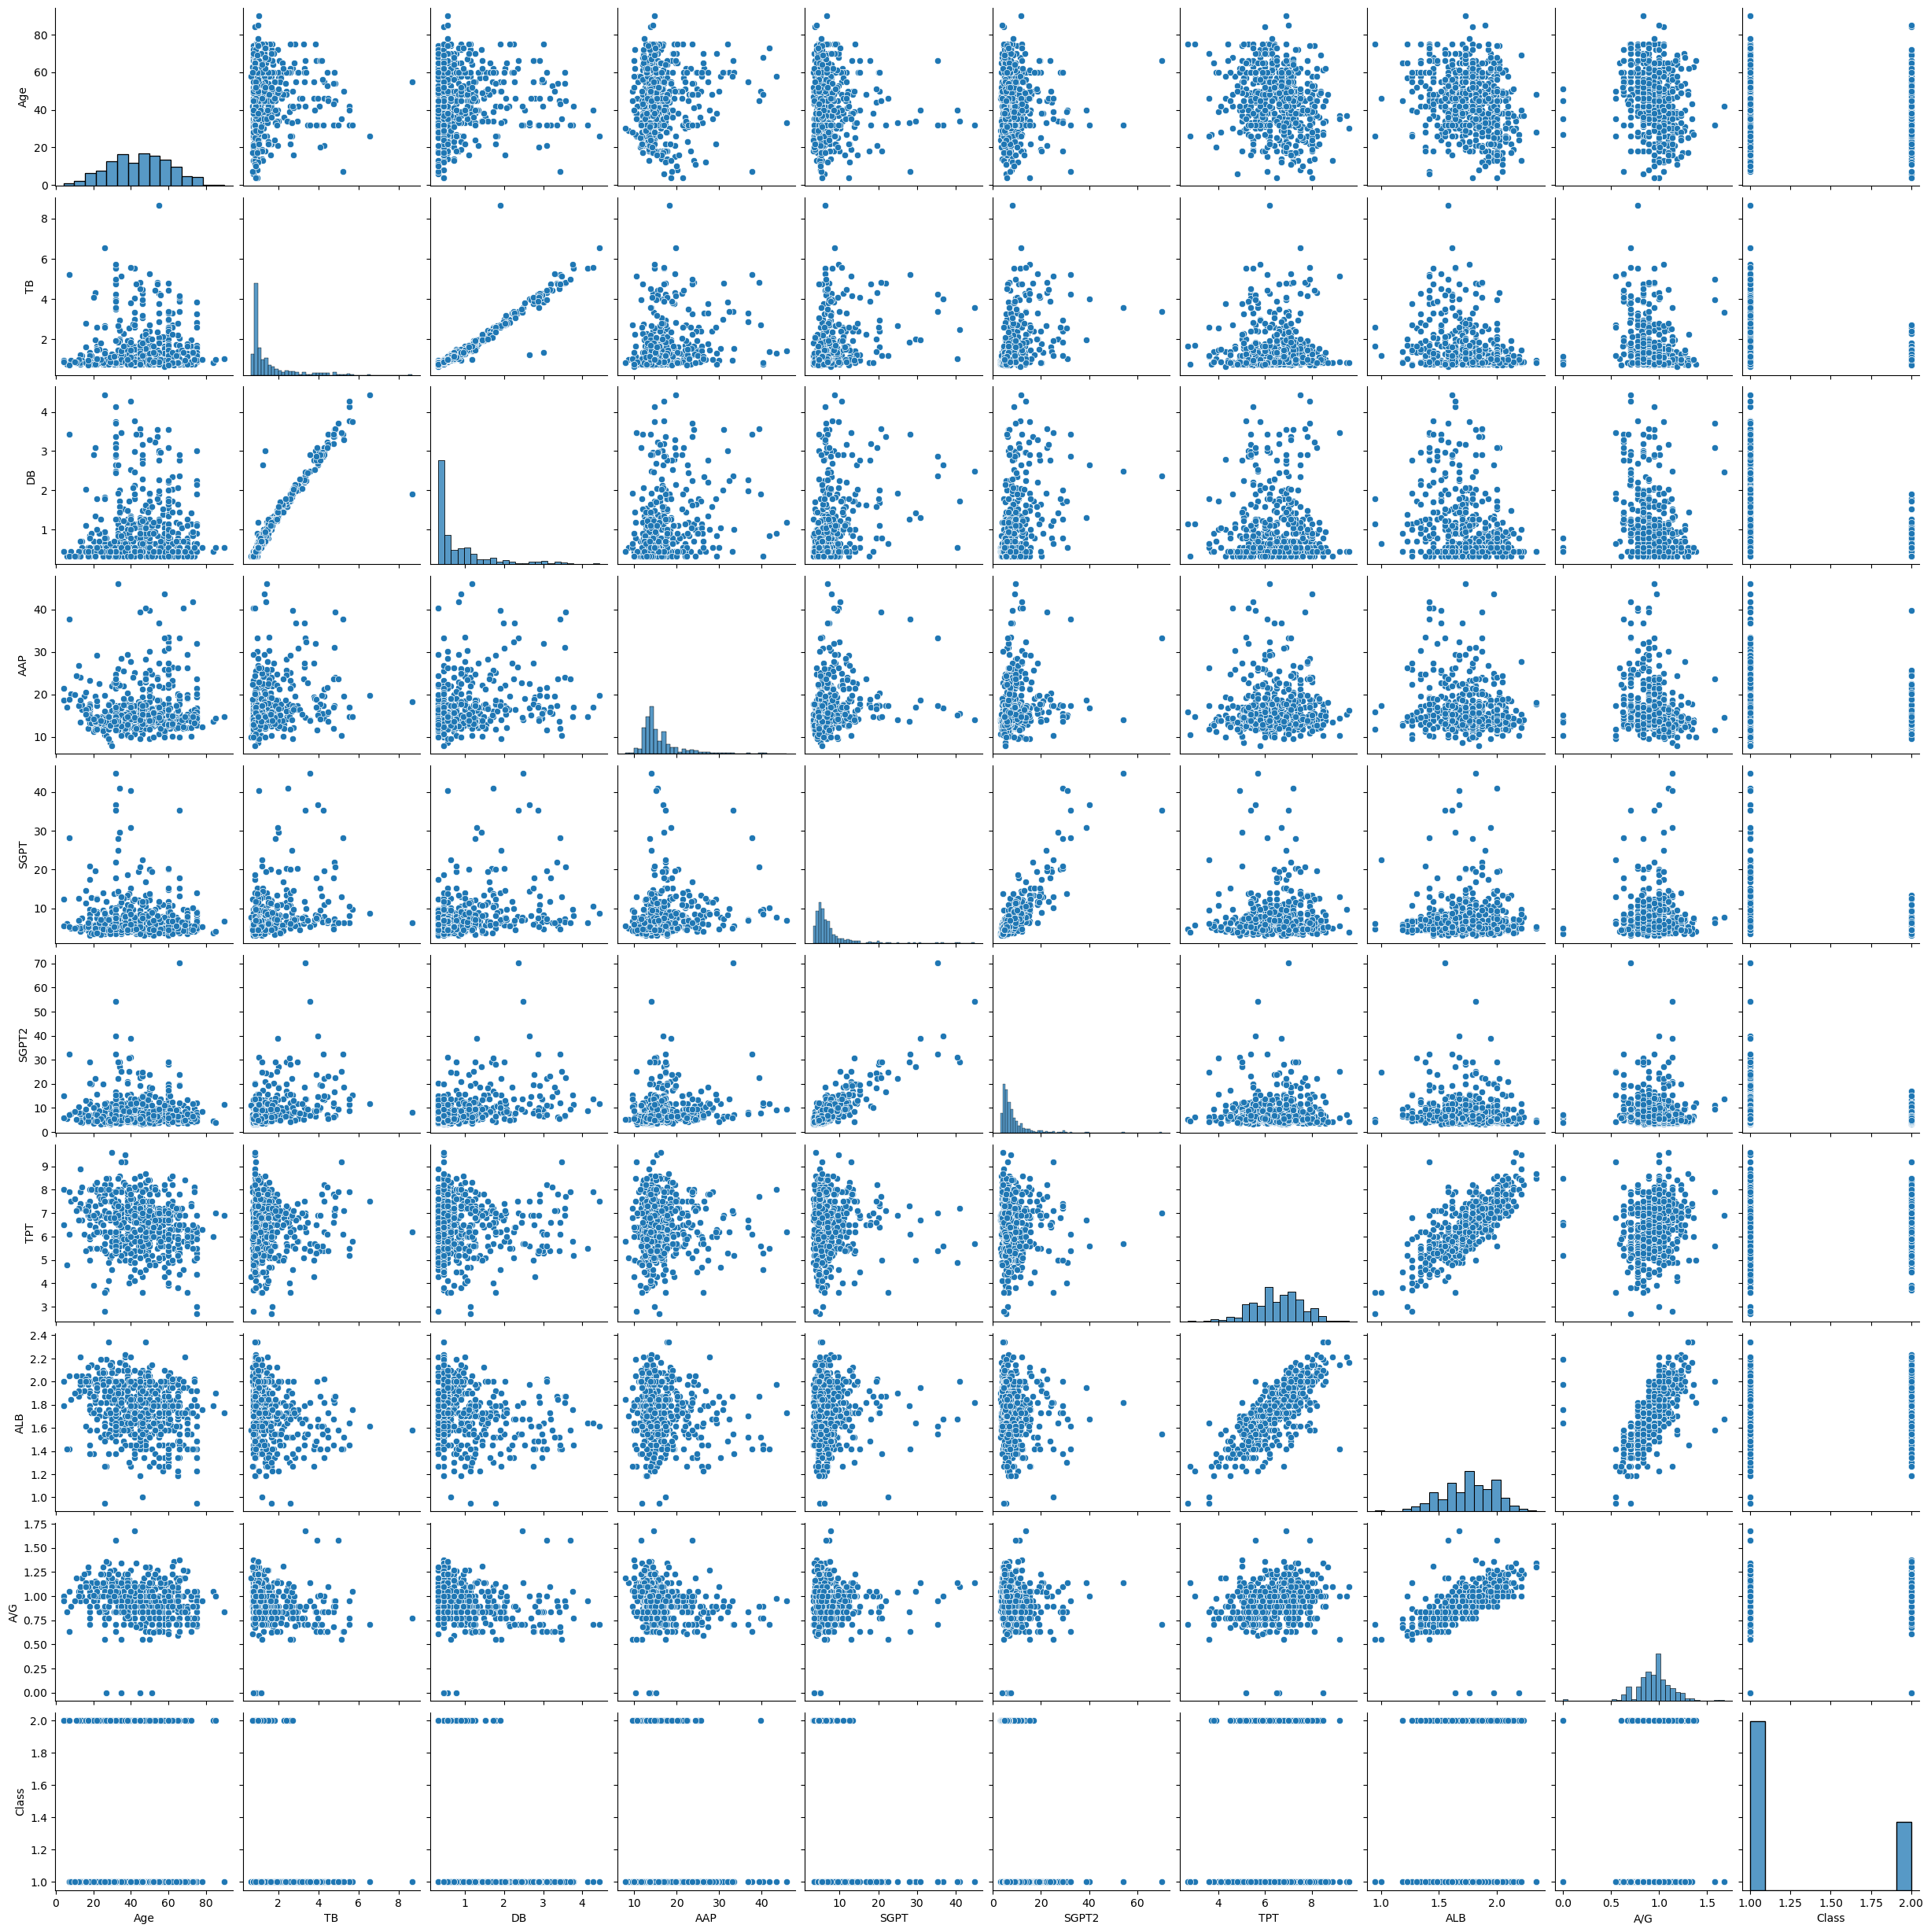

In [23]:
sns.pairplot(ilpd)

In [24]:
num_col=list(feature.dtypes[feature.dtypes!="object"].index)

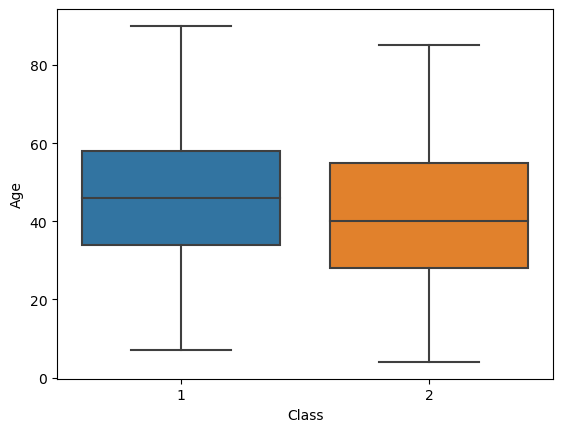

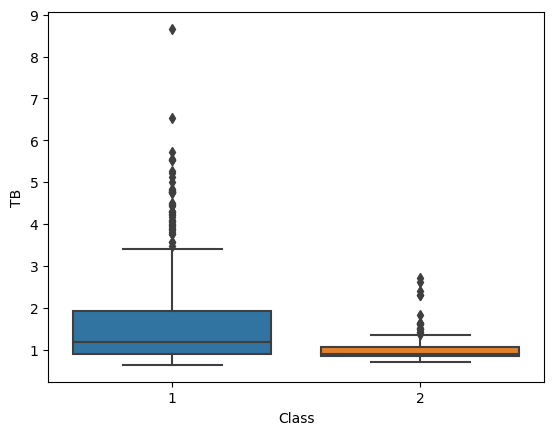

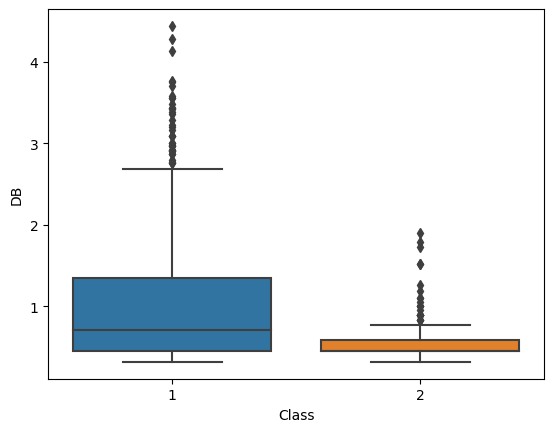

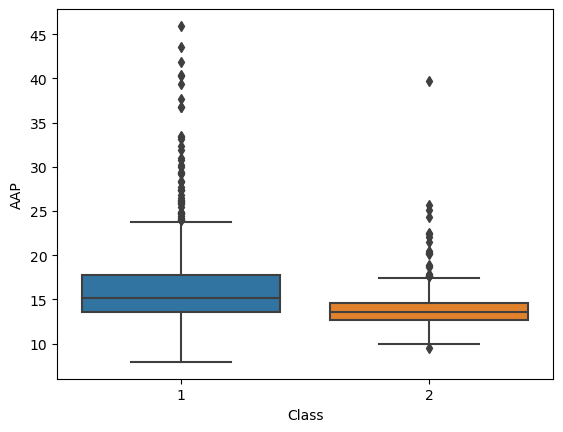

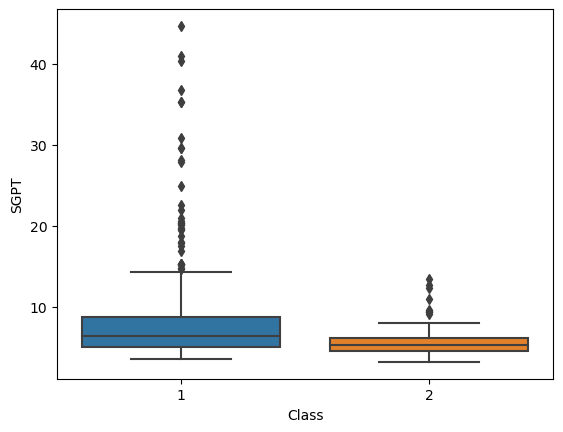

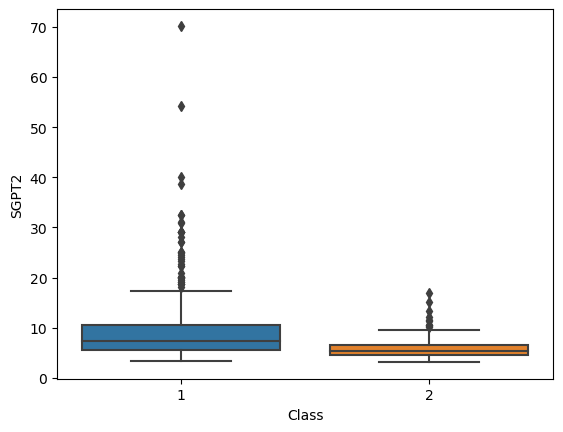

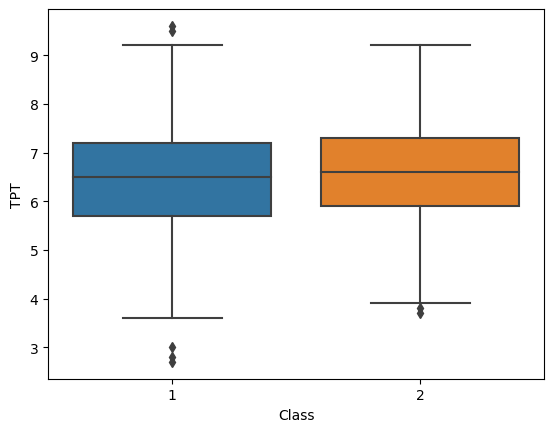

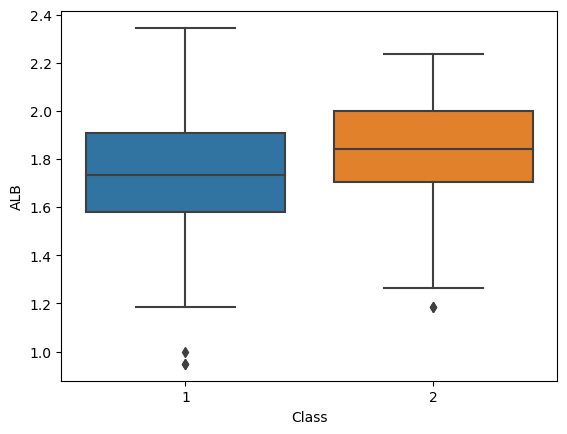

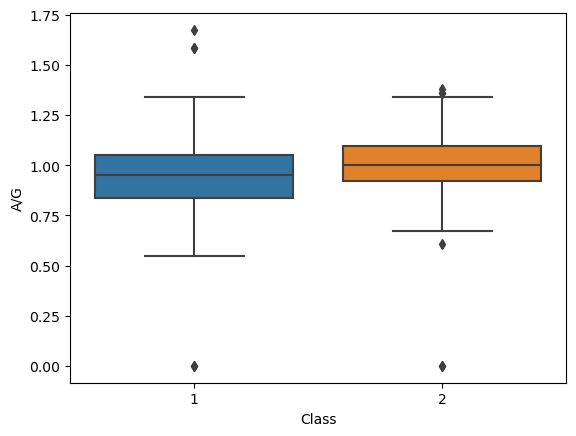

In [25]:
for i in num_col:
    sns.boxplot(x=ilpd.Class,y=ilpd[i])
    plt.show()

<Axes: >

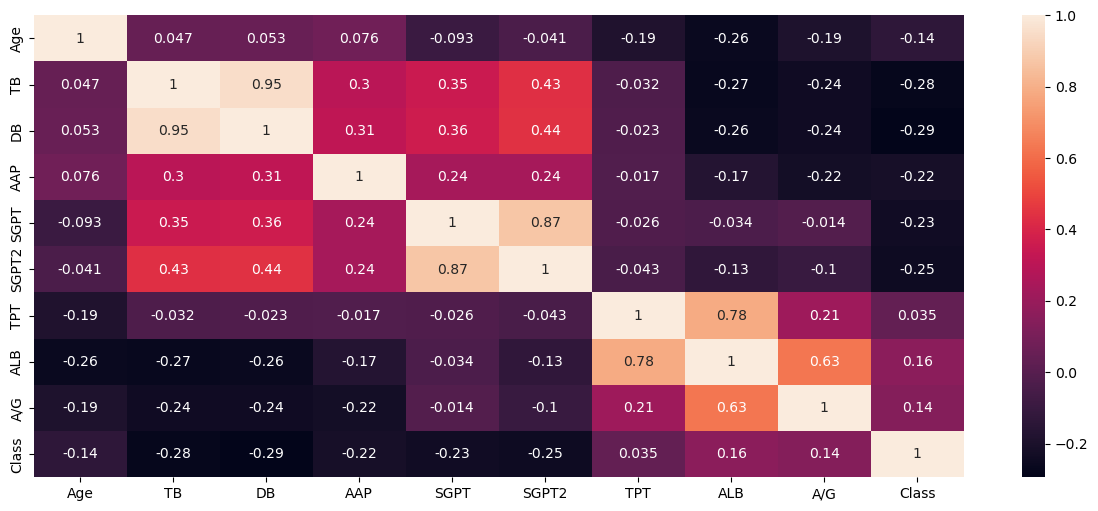

In [26]:
plt.figure(figsize=(15,6))
sns.heatmap(ilpd.corr(),annot=True)

Finding out high correlated columns

In [27]:
def corr(data,thres):
    corr_col=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thres:
                col_name=corr_matrix.columns[i]
                corr_col.add(col_name)
    return corr_col

In [28]:
corr_feature=list(corr(feature,0.7))
corr_feature

['DB', 'ALB', 'SGPT2']

In [29]:
ilpd.drop(corr_feature,axis=1,inplace=True)

Encoding

In [30]:
ilpd["Gender"]=pd.get_dummies(ilpd["Gender"],drop_first=True)
ilpd.head()

,Age,Gender,TB,AAP,SGPT,TPT,A/G,Class
0,62,1,3.301515,26.438608,8.000000,7.5,0.860233,1
1,62,1,2.701851,22.135944,7.745967,7.0,0.943398,1
2,58,1,1.000000,13.490738,3.741657,6.8,1.000000,1
3,72,1,1.974842,13.964240,5.196152,7.3,0.632456,1
4,46,1,1.341641,14.422205,4.358899,7.6,1.140175,1


In [31]:
ilpd["Class"].unique()

array([1, 2], dtype=int64)

In [32]:
ilpd["Class"]=pd.get_dummies(ilpd["Class"],drop_first=True)
ilpd.head()

,Age,Gender,TB,AAP,SGPT,TPT,A/G,Class
0,62,1,3.301515,26.438608,8.000000,7.5,0.860233,0
1,62,1,2.701851,22.135944,7.745967,7.0,0.943398,0
2,58,1,1.000000,13.490738,3.741657,6.8,1.000000,0
3,72,1,1.974842,13.964240,5.196152,7.3,0.632456,0
4,46,1,1.341641,14.422205,4.358899,7.6,1.140175,0


# Split dataset into train and test (70:30) 

In [33]:
X=ilpd.drop(["Class"],axis=1)
X.head()

,Age,Gender,TB,AAP,SGPT,TPT,A/G
0,62,1,3.301515,26.438608,8.000000,7.5,0.860233
1,62,1,2.701851,22.135944,7.745967,7.0,0.943398
2,58,1,1.000000,13.490738,3.741657,6.8,1.000000
3,72,1,1.974842,13.964240,5.196152,7.3,0.632456
4,46,1,1.341641,14.422205,4.358899,7.6,1.140175


In [34]:
y=ilpd["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: uint8

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (407, 7)
Shape of X_test : (175, 7)
Shape of y_train : (407,)
Shape of y_test : (175,)


In [36]:
y_train.value_counts(normalize=True)

0    0.707617
1    0.292383
Name: Class, dtype: float64

In [37]:
y_test.value_counts(normalize=True)

0    0.725714
1    0.274286
Name: Class, dtype: float64

#  Fit a base model and explain the reason of selecting that model. Please write your key observations

#  What is the overall Accuracy? Please comment on whether it is good or not.

In [38]:
DT=DecisionTreeClassifier(random_state=1)

In [39]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [40]:
y_train.shape

(407,)

In [41]:
y_pred_train_DT=DT.predict(X_train)

# What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. 

In [42]:
print("Train Report")
print(classification_report(y_train,y_pred_train_DT))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       119

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407



In [43]:
y_pred_test_DT=DT.predict(X_test)
print("Test Report")
print(classification_report(y_test,y_pred_test_DT))

Test Report
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       127
           1       0.38      0.44      0.40        48

    accuracy                           0.65       175
   macro avg       0.57      0.58      0.58       175
weighted avg       0.66      0.65      0.65       175



# Which variables are significant?

In [44]:
feat_col=list(X.columns)

In [45]:
from sklearn.feature_selection import chi2

res = chi2(ilpd[feat_col], ilpd["Class"])
features = pd.DataFrame({
    'features': ilpd[feat_col].columns,
    'p-value': np.round(res[1],4)
})

In [46]:
features[features["p-value"] <0.05]

,features,p-value
0,Age,0.0
2,TB,0.0
3,AAP,0.0
4,SGPT,0.0


These 4 feature are significent 

# What is Cohen’s Kappa Value and what inference do you make from the model 

Cohen's Kappa has been found to be a reliable and valid measure of inter-rater agreement. The Cohen Kappa Score is used to compare the predicted labels from a model with the actual labels in the data. The score ranges from -1 (worst possible performance) to 1 (best possible performance).

In [47]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred_test_DT,y_test)

0.1539301310043668

In [48]:
cohen_kappa_score(y_pred_train_DT,y_train)

1.0

the model either performing very well nor performing very bad

# Which other key model output parameters do you want to look at?

Confusion matrix

In [49]:
confusion_matrix(y_test,y_pred_test_DT)

array([[92, 35],
       [27, 21]], dtype=int64)

In [50]:
TPR=92/(92+27)
print("True positve rate :",TPR)
FPR=35/(35+21)
print("False postive rate :",FPR)

True positve rate : 0.773109243697479
False postive rate : 0.625


From this we have to increase the TPR value as possible as close to 1 by reducing False Negative value.
And we have to decrese the FPR value as possible as close to 0 by reducing False Positve value

In [51]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred_test_DT)

In [90]:
fpr

array([0.        , 0.27559055, 1.        ])

In [52]:
y_test.unique()

array([0, 1], dtype=uint8)

In [53]:
thresholds

array([2, 1, 0])

In [54]:
from sklearn import metrics

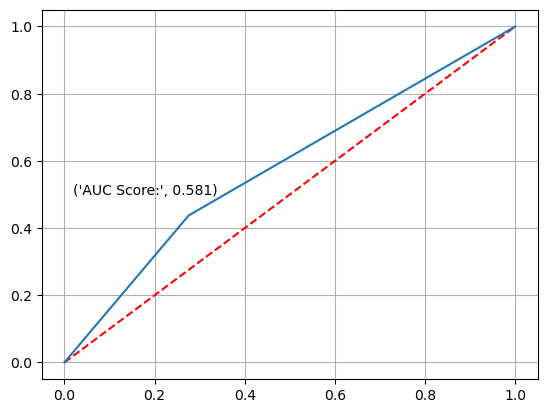

In [55]:
# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.5, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_test_DT),4)))

plt.grid(True)

 The AUC score is 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding. from the above graph we can say that model is not performing well.

# Balancing Data set 

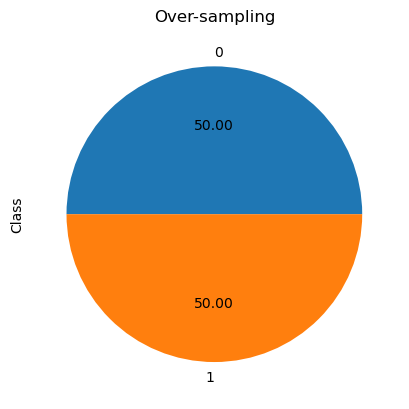

In [56]:
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy="not majority") # string
ros = RandomOverSampler(sampling_strategy=1) # float
X_res, y_res = ros.fit_resample(X,y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=1)

# How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.

In [59]:
RF=RandomForestClassifier(random_state=1)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [60]:
y_pred_train_RF=RF.predict(X_train)
print("Classcifiaction Report of Train Data")
print(classification_report(y_train,y_pred_train_RF))
print("* "*50)
y_pred_test_RF=RF.predict(X_test)
print("Classcifiaction Report of test Data")
print(classification_report(y_test,y_pred_test_RF))

Classcifiaction Report of Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       288

    accuracy                           1.00       581
   macro avg       1.00      1.00      1.00       581
weighted avg       1.00      1.00      1.00       581

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Classcifiaction Report of test Data
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       122
           1       0.77      0.86      0.81       127

    accuracy                           0.80       249
   macro avg       0.80      0.79      0.79       249
weighted avg       0.80      0.80      0.79       249



In [61]:
confusion_matrix(y_test,y_pred_test_RF)

array([[ 89,  33],
       [ 18, 109]], dtype=int64)

In [62]:
cohen_kappa_score(y_pred_test_RF,y_test)

0.58920195387054

# Finding best feature for model

In [63]:
important_feature=pd.DataFrame({"Feature": X.columns,
                               "Importance":RF.feature_importances_})
best_feat=list(important_feature.sort_values(by="Importance",ascending=False)[:5]["Feature"])
best_feat

['AAP', 'TB', 'SGPT', 'Age', 'TPT']

In [64]:
X_train_best=X_train[best_feat]
X_test_best=X_test[best_feat]

In [65]:
RF_1=RandomForestClassifier(random_state=1).fit(X_train_best,y_train)

In [66]:
y_pred_RF=RF_1.predict(X_test_best)

In [67]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       122
           1       0.77      0.87      0.81       127

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249



In [68]:
confusion_matrix(y_test,y_pred_RF)

array([[ 89,  33],
       [ 17, 110]], dtype=int64)

In [69]:
cohen_kappa_score(y_test,y_pred_RF)

0.5971916655881973

# Grid Search CV for Finding the best perameters for our model

In [70]:
param=[{"max_depth": list(range(1,9)),
       "max_features":list(range(1,9))}]
clf=GridSearchCV(RF_1,param,cv=10,scoring="accuracy")
clf.fit(X_train_best,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='accuracy')

In [71]:
print(clf.best_params_)

{'max_depth': 8, 'max_features': 2}


In [72]:
print(clf.best_score_)

0.810666277030976


In [82]:
RF_2=RandomForestClassifier(random_state=5,max_depth=8,max_features=2).fit(X_train_best,y_train)

In [83]:
y_pred_RF2=RF_2.predict(X_test_best)

In [84]:
print(classification_report(y_test,y_pred_RF2))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       122
           1       0.71      0.91      0.80       127

    accuracy                           0.77       249
   macro avg       0.79      0.76      0.76       249
weighted avg       0.79      0.77      0.76       249



# Summarize

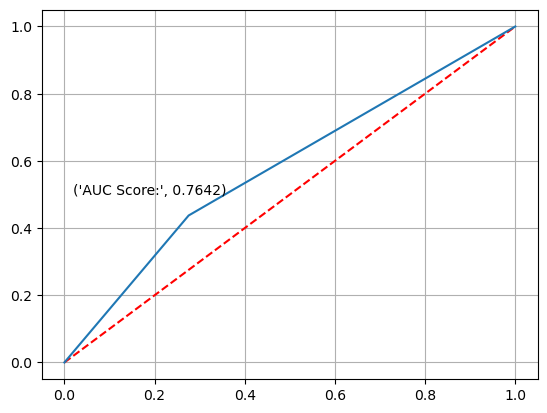

In [89]:
# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.5, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_RF2),4)))

plt.grid(True)

From the above plot I can say the our final tune model performing better than the base model. I 1st model we get auc score 0.581 
and in the final model we are getting AUC score more closer to 1 (which is 0.7642).

In [85]:
cohen_kappa_score(y_test,y_pred_RF2)

0.5313777662405088

Aslo cohen score in the 1st model is very low which is 0.15 and now I am getting a score far better than the 1st model which is 0.531.

Selecting importance feature and balancing the data set effect the model performance. Also tuning help to prevent our model for becoming overfit model.

The risk in our model is we did not get the best accuracy. Our model is performing good but there is chance of improvement. If we build boosting model like adaboost or adding more feature in the model may increase the performance.